### SEIS 763-01: Homework 5
#### Completed by: Jamie Boehme

Import libraries needed for analysis.

In [50]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV, LassoCV, LassoLarsCV, Lasso
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

Import cell DNA data from “ML_HW_Data_CellDNA.csv” file located on Github.

In [51]:
file = 'https://raw.githubusercontent.com/jamieboehme/Machine-Learning/main/ML_HW_Data_CellDNA.csv'
cell = pd.read_csv(file, header=None)
cell.columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','Target']
cell.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Target
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7


Do some exploratory analysis of the dataset including: reviewing number of columns and rows, data types, and overall shape of each column. Determine if there appear to be any obvious outliers. Check if there are any null values that will need to be taken care of prior to building a linear regression model.

In [52]:
cell.shape

(1217, 14)

In [53]:
cell.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'Target'],
      dtype='object')

In [54]:
cell.dtypes

V1          int64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8          int64
V9          int64
V10       float64
V11       float64
V12       float64
V13       float64
Target      int64
dtype: object

In [55]:
cell.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Target
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,200.366475,419.476953,211.335155,33.388599,9.376939,0.908628,0.160337,202.640099,0.516845,15.288929,0.775538,0.474788,78.928198,0.903862
std,135.665649,215.563920,141.592818,19.152143,3.634969,0.110942,50.589440,142.585975,2.071880,4.623930,0.117802,0.158341,48.798548,2.348318
min,70.000000,28.176471,27.870130,10.282437,3.080963,0.218074,-89.531335,70.000000,-26.000000,9.440697,0.261049,0.114482,28.193000,0.000000
25%,107.000000,243.400000,96.200000,18.760441,7.529888,0.885337,-41.131405,108.000000,1.000000,11.672045,0.702186,0.353261,45.974000,0.000000
50%,160.000000,415.360000,183.834286,27.832476,8.463304,0.949998,-0.104479,161.000000,1.000000,14.272993,0.789474,0.474359,66.302000,0.000000
75%,252.000000,611.128440,292.824742,44.462419,9.801152,0.978903,41.010273,253.000000,1.000000,17.912464,0.866071,0.592593,97.928000,0.000000
max,1089.000000,773.919643,575.340206,155.330123,43.487111,0.998459,89.881120,1159.000000,1.000000,37.236513,1.000000,0.905882,493.749000,10.000000


In [56]:
cell.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
Target    0
dtype: int64

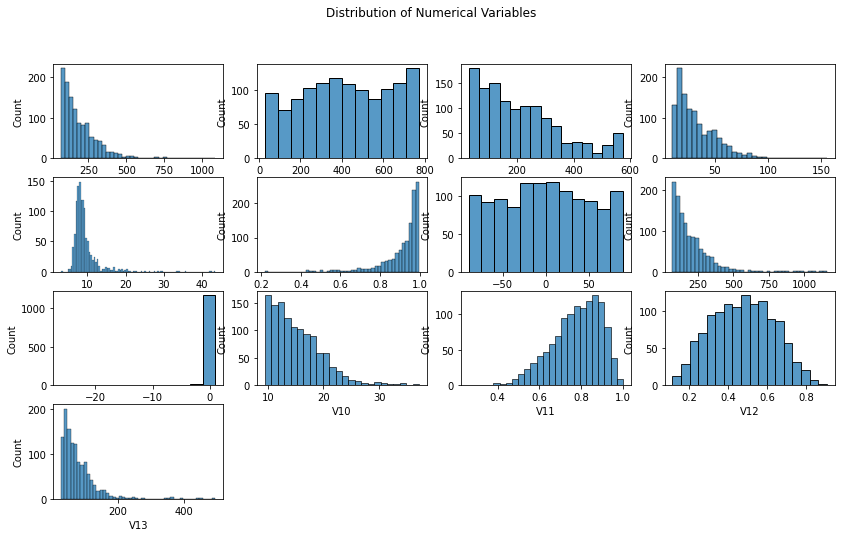

In [57]:
def graph_num(num_variable, dataframe):
    sns.histplot(dataframe[num_variable])
    
num_columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13']
plot_num = plt.figure(figsize=(14,8))
plt.suptitle('Distribution of Numerical Variables')

plotnum=1
for num_var in num_columns:
    plt.subplot(4,4,plotnum)
    graph_num(num_var, cell)
    plotnum +=1
plt.show()

The above graphs show that we may have outliers in our data based upon a few distributions - however, without further domain knowledge we will ignore eliminating any data points at this time.

Prep the target variable for modeling:
- Seperate target variable from the cell dataframe
- Convert the target variable back to a dataframe
- Replace all values > 0 with a 1 for bivariate analysis

In [58]:
target_split = cell.loc[:,'Target']
target_split = pd.DataFrame(target_split)
target_split.loc[target_split.Target > 0, 'Target'] = 1

In [59]:
target_split.describe()

,Target
count,1217.000000
mean,0.164339
std,0.370735
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [60]:
Y = target_split.values.ravel()

Standardize numeric variables for the purposes of modeling.

In [61]:
cell_predictors = cell.iloc[:,0:13]

In [62]:
cell_predictors.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072


In [63]:
ZX= preprocessing.scale(cell_predictors)
X = pd.DataFrame(ZX)
print(X, '\n')
print(X.mean(axis=0), 
X.std(axis=0))

            0         1         2         3         4         5         6   \
0     0.159528 -1.802006 -1.208134  0.114420 -0.135689  0.538311 -1.587426   
1    -0.939212 -1.809877  0.424363 -0.933511 -0.817247  0.019258  1.500586   
2     0.410247 -1.673790  0.555385  0.200447  0.134019  0.501621  1.684134   
3    -0.548385 -1.617137  1.879947 -1.059096  0.939523 -6.206504  1.253012   
4     0.181650 -1.525316  2.335905  0.578476 -0.417798  0.681969 -1.048779   
...        ...       ...       ...       ...       ...       ...       ...   
1212  0.115283  1.480684  0.036132  0.252878  0.049329  0.537678  0.250896   
1213  0.941181  1.528803 -1.156399  1.554010 -0.075675  0.729753  1.142193   
1214 -0.762234  1.588181 -0.028590 -0.555628 -0.315562  0.213238 -0.491114   
1215  0.166902  1.629782  0.170750  1.050082 -0.201979  0.705453  1.445251   
1216 -0.835975  1.603325  0.383793 -1.040983 -0.235315 -1.213681  0.364560   

            7         8         9         10        11        1

**1. Use logistic + lasso regression with 10-fold cross-validation to
identify useful predictors.**

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 1234)

Create logistic regression model without Lasso (for fun and to see level of accuracy)

In [65]:
log_model = linear_model.LogisticRegression()
log_model.fit(x_train, y_train) 
coef = log_model.coef_

Predict data and analyze results for precision, recall, and f1-score. -- The results appear "successful"

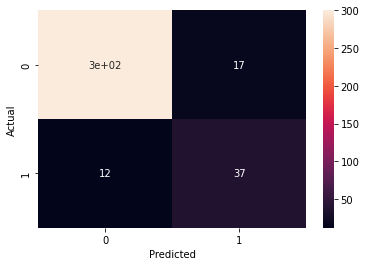

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       317
           1       0.69      0.76      0.72        49

    accuracy                           0.92       366
   macro avg       0.82      0.85      0.84       366
weighted avg       0.92      0.92      0.92       366



In [66]:
y_hat = log_model.predict(x_test)

confusion_matrix = pd.crosstab(y_test, y_hat,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Stats = classification_report(y_test, y_hat)
print(Stats)

Perform Logistic Lasso regression with 10 fold cross-validation (using L1 regularization)

In [67]:
lasso_log_l1 = LogisticRegressionCV(penalty = 'l1', solver='liblinear', cv = 10)
lasso_log_fit_l1 = lasso_log_l1.fit(x_train, y_train)
print('\nLasso Log Scores')
print('Train ', lasso_log_fit_l1.score(x_train, y_train))
print('Test', lasso_log_fit_l1.score(x_test,y_test))


Lasso Log Scores
Train  0.9212690951821386
Test 0.9234972677595629


Predict data and analyze results for precision, recall, and f1-score following Logistic Lasso Regression analysis. -- The results appear "successful"

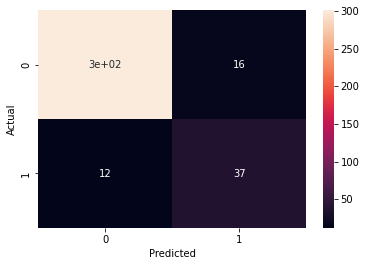

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       317
           1       0.70      0.76      0.73        49

    accuracy                           0.92       366
   macro avg       0.83      0.85      0.84       366
weighted avg       0.93      0.92      0.92       366



In [68]:
y_hat_lasso = lasso_log_fit_l1.predict(x_test)

confusion_matrix = pd.crosstab(y_test, y_hat_lasso,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Stats = classification_report(y_test, y_hat_lasso)
print(Stats)

In [69]:
m_log_alphas_lars = (lasso_log_fit_l1.Cs_)
print("Lambda, amount of regularization\n",m_log_alphas_lars)
print("\nCoefficients over different regularization\n", lasso_log_fit_l1.coefs_paths_) 

Lambda, amount of regularization
 [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Coefficients over different regularization
 {1: array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00, -4.29144011e-01],
        ...,
        [ 1.21396575e+00,  1.79548342e-01, -4.49900380e-03, ...,
          2.89749472e-01,  2.18072302e-01, -1.18176040e+01],
        [ 1.89045943e+00,  1.79278622e-01, -4.73025813e-03, ...,
          2.90631103e-01,  2.24889600e-01, -1.20802152e+01],
        [ 2.26730578e+00,  1.79000558e-01, -4.79448421e-03, ...,
          2.90436405e-01,  2.24047199e-01, -1.22372243e

Because we cannot see each k-fold, and how the coefficients are changing - I will validate most optimal lambda and coefficients programattically and graphically.

In [70]:
print("\nProgramattically most optimal lambda\n",lasso_log_fit_l1.C_)
print("\nProgramattically most optimal coefficients over different regularization\n", lasso_log_fit_l1.coef_) 


Programattically most optimal lambda
 [0.35938137]

Programattically most optimal coefficients over different regularization
 [[ 0.          0.12281279 -0.01154387  3.13262565 -3.00373435  0.
  -0.1589602   0.          0.          0.          0.          0.
   0.        ]]


**2. Plot a lasso plot with readable tick labels on the X and Y coordinates in your plot
for easy visualization and verification. (This question is optional for Python
Program)**

In [74]:
np.logspace(-4,4,number_of_steps)

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

In [71]:
#RUN LASSO

#K Fold cross validation, using n splits
n = 10

kf = KFold(n_splits=n)

X_header = num_columns
#define a range for the lambdas/alphas, use a number of desired steps and a max and an offset
offset = 0.00000000001
number_of_steps = 100
maxlambda = 2.5

#define step in terms of the other variables
step = maxlambda / number_of_steps

#create the range of lambdas
#unique_lambdas = np.arange(0 + offset, maxlambda + step, step)
unique_lambdas = np.logspace(-4,4,number_of_steps)
save_avg_coef = []
save_avg_intercept = []
tmp_error = []
save_error = []
        
#for each lambda, for each K fold, build a linear model using Lasso
for the_lambda in unique_lambdas:
    
    #initalize a blank sum coef
    sum_coef = [0] * len(X_header)
    sum_intercept = 0
    
    #for each K fold
    for train_index, test_index in kf.split(X):
        #create test/training for X and Y
        X_train, X_test = x_train, x_test
        Y_train, Y_test = y_train, y_test
    
        #build the model
        clf = linear_model.LogisticRegression(C = the_lambda, max_iter=1000)
        clf.fit(x_train, y_train)

        #save the coefficients...
        #save_coefs.append(clf.coef_)
       
        #compute the average coefficents using the sum...
        for i in range(len(clf.coef_[0])):
            sum_coef[i] += clf.coef_[0][i]  

        #compute the avegerate internet using the sum...
        sum_intercept += clf.intercept_
        
            
        #create some predictions using TEST
        y_test_pred = clf.predict(x_test)
        mse = mean_squared_error(y_test, y_test_pred)
        tmp_error.append(mse)
        #save_error.append(mse)
        
    #initialize an avg coef
    avg_coef = [0] * len(X_header)
    
    #compute the average coefficient by taking the sum of each coef div by number of splits
    for i in range(len(sum_coef)):
        avg_coef[i] = sum_coef[i] / n
    
    #save the averaged coefficient
    save_avg_coef.append(avg_coef)
    
    #average intercept is sum of intercepts div by number of splits
    avg_intercept = sum_intercept / n
    
    #save averaged intercept for later
    save_avg_intercept.append(avg_intercept)
    
    #compute the average error for all the K folds
    save_error.append(np.average(tmp_error))

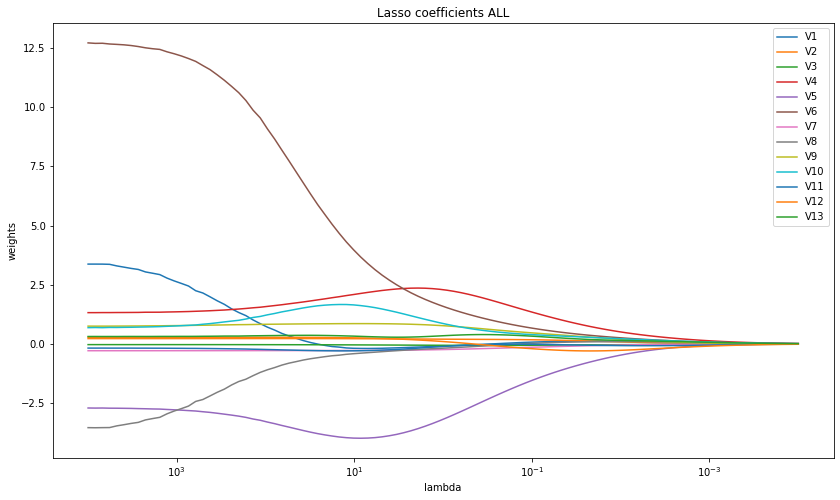

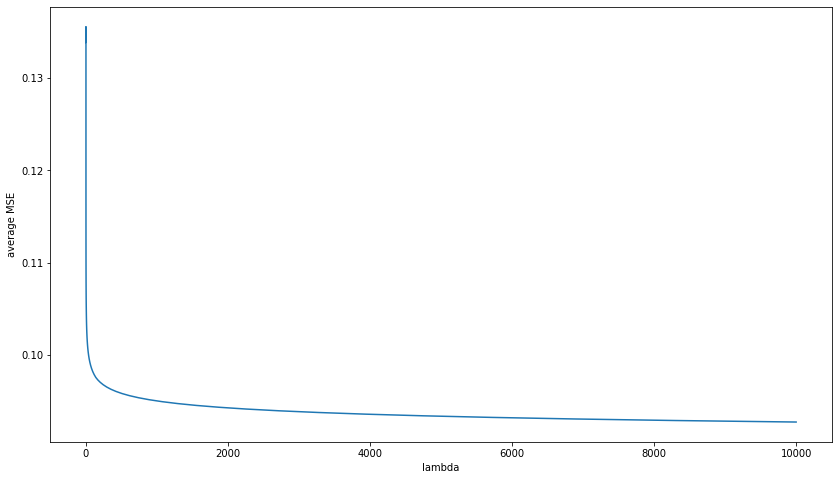

In [72]:
#LASSO PLOT, FULL
plt.figure(figsize=(14, 8))
ax = plt.gca()
ax.plot(unique_lambdas, save_avg_coef)
#create log scale
ax.set_xscale('log')
#reverse the axis
ax.set_xlim(ax.get_xlim()[::-1])  
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients ALL')
plt.axis('tight')
#use my header for the legend
plt.legend(X_header)
plt.show()


#PLOT MSE
plt.figure(figsize=(14, 8))
plt.xlabel('lambda')
plt.ylabel('average MSE')
plt.plot(unique_lambdas, save_error)
plt.show()

Graphically I can see that the balance between error and complexity is where lambda is between .3 and .4. In addition, I can see the weight of the coefficients where lambda is between .3 and .4 shows most impact and balance between the coefficients, where when lambda is greater than .4 there is an even weight of value on lambda across all coefficients.

In [73]:
#find index of lambda around 0.35
lambda_index = 15
display("LAMBDA with value of .35:", unique_lambdas[lambda_index])
display(X_header)
#how show same avg_coefs
display("COEFS:", save_avg_coef[lambda_index])
display(save_avg_intercept[lambda_index])

'LAMBDA with value of .35:'

0.0016297508346206436

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13']

'COEFS:'

[0.07971936995439952,
 0.022614906640849915,
 -0.013346811093447587,
 0.18485757806648556,
 -0.10373195419539963,
 0.10003382052439311,
 -0.011240848669604299,
 0.07076485464236323,
 0.05930976656500385,
 0.10484204130021499,
 -0.06012316252299764,
 -0.12459798911666373,
 0.08715138084261397]

array([-1.66833019])

**3. Which top THREE (3) predictors are you going to select to explain why a
bacteria is an “interesting” candidates for further study?**

The top three predictors I see as most important in predciting why a bacteria is an 'interesting' candidate are variables 4,5, and 6 (or the fourth through sixth columns in the provided csv dataset). 

**4. What is the lambda (l) value you choose in order to select the top 3 predictors
you identified in the last question?**

The lambda I chose to select the top 3 predictors is lambda = .35, however I believe any lambda between .3 and .4 would provide an optimal solution. I chose .35, because that is where I see a balance in error vs complexity in my graphical representation of the lasso plot by MSE and Lasso Coefficients.

**5. What are the theta values for the 3 selected predictors at the lambda (l) value you
identified in the last question?**

The theta values for the three selected predictors at my chosen lambda of .35 are:
- Variable 4: 1.93512
- Variable 5: -2.41511
- Variable 6: 1.08163